# <center>#  Clustering

# Objective: Customer Segmentation
    

NZ Airlines has a frequent flyer program.NZA wishes to develop meaningful customer segments using the FFP customer behavior data so that it can target different customer segments with different types of mileage offers.

#A frequent-flyer program (FFP) is a loyalty program offered by an airline.

Many airlines have frequent-flyer programs designed to encourage airline customers enrolled in the program to accumulate points (also called miles) which may then be redeemed for air travel or other rewards. Points earned under FFPs may be based on the class of fare, distance flown on that airline or its partners, or the amount paid. There are other ways to earn points by using co-brand/associated retail outlets than by air travel. Points can be redeemed for air travel, other goods or services, or for increased benefits, such as travel class upgrades, airport lounge access, fast track access, or priority bookings.

In [1]:
#importing necessary packages
import os
os.chdir('C:/Users/sreepa/Downloads')
# Pandas - to work with dataframes
import pandas as pd
# seaborn - package for visualization
import seaborn as sns
# matplotlib - package for visualization
import matplotlib.pyplot as plt
# Sklearn - package to standardize data => z=(xi-mu)/sigma
from sklearn.preprocessing import StandardScaler 
#to perform clustering 
from sklearn import cluster
#package for Hierarchical Clustering
from sklearn.cluster import AgglomerativeClustering
#Plot the hierarchical clustering as a dendrogram
#linkage methods are used to compute the distance between the clusters
from scipy.cluster.hierarchy import dendrogram, linkage
import copy as cp
#silhouette_score compute the mean Silhouette Coefficient of all samples.
#silhouette_samples provides the Silhouette scores for each sample of different clusters.
from sklearn.metrics import silhouette_samples, silhouette_score
#package for Principal component analysis 
from sklearn.decomposition import PCA

In [2]:
#Reading Data
data = pd.read_excel('FrequentFlyerProgram.xls', sheet_name='Data')

In [3]:
#information about the data(datatypes,number of rows and columns etc)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   FFP#                3999 non-null   int64
 1   AwardMiles          3999 non-null   int64
 2   EliteMiles          3999 non-null   int64
 3   PartnerMiles        3999 non-null   int64
 4   PartnerTrans        3999 non-null   int64
 5   FlyingReturnsMiles  3999 non-null   int64
 6   FlightTrans         3999 non-null   int64
 7   EnrollDuration      3999 non-null   int64
dtypes: int64(8)
memory usage: 250.1 KB


<b>#Observation</b><br>
The Dataset consists of 8 Variables and the Number of samples are 3999. All variables are of integer datatype.There are no null values in any of the columns.

In [4]:
#Description of Data(Average,Standard Deviation,Five point Summary)
data.describe()

,FFP#,AwardMiles,EliteMiles,PartnerMiles,PartnerTrans,FlyingReturnsMiles,FlightTrans,EnrollDuration
count,3999.000000,3.999000e+03,3999.000000,3999.000000,3999.00000,3999.000000,3999.000000,3999.00000
mean,2014.819455,7.360133e+04,144.114529,17144.846212,11.60190,460.055764,1.373593,4118.55939
std,1160.764358,1.007757e+05,773.663804,24150.967826,9.60381,1400.209171,3.793172,2065.13454
min,1.000000,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,2.00000
25%,1010.500000,1.852750e+04,0.000000,1250.000000,3.00000,0.000000,0.000000,2330.00000
50%,2016.000000,4.309700e+04,0.000000,7171.000000,12.00000,0.000000,0.000000,4096.00000
75%,3020.500000,9.240400e+04,0.000000,23800.500000,17.00000,311.000000,1.000000,5790.50000
max,4021.000000,1.704838e+06,11148.000000,263685.000000,86.00000,30817.000000,53.000000,8296.00000


#<b>Observation</b><br>
AwardMiles have an average value of 73601 and a standard deviation of 100775. Minimum value is 0 and the maximum value is 1704838.
<br>EliteMiles have an average value of 144 and a standard deviation of 773.66. Minimum value is 0 and the maximum value is 11148.
<br>PartnerMiles have an average value of 17144 and a standard deviation of 24150. Minimum value is 0 and the maximum value is 263685.
<br>PartnerTrans have an average value of 11.6 and a standard deviation of 9.6. Minimum value is 0 and the maximum value is 86.
<br>FlyingReturnsMiles have an average value of 460 and a standard deviation of 1400. Range is [0,30817].
<br>FlyingTrans have an average value of 1.37 and a standard deviation of 3.79. Range is [0,53].
<br>EnrollDuration have an average value of 4118 and a standard deviation of 2065. Range is [2,8296].<br>
Mean is much greater than the Median for variables AwardMiles,EliteMiles,PartnerMiles and FlyingReturnMiles. Which means it is a right skewed distribution<br> 

Here, we see that there is a lot of variation in the magnitude of the data. Variables like PartnerTrans,FlightTrans have low magnitude whereas variables like AwardMiles,EliteMiles,PartnerMiles etc. have a higher magnitude.
Since K-Means is a distance-based algorithm, this difference of magnitude can create a problem. So we need to bring all the variables to the same magnitude:

In [5]:
#First 5 rows of dataset
data.head()

,FFP#,AwardMiles,EliteMiles,PartnerMiles,PartnerTrans,FlyingReturnsMiles,FlightTrans,EnrollDuration
0,1072,42040,1000,14189,17,4034,13,5717
1,1502,30486,0,0,0,0,0,5051
2,2307,85496,0,2799,7,2711,6,3820
3,3652,1884,0,0,0,0,0,31
4,815,42044,2253,11433,10,0,0,6140


In [6]:
#to check whether there are null values
data.isnull().sum()

FFP#                  0
AwardMiles            0
EliteMiles            0
PartnerMiles          0
PartnerTrans          0
FlyingReturnsMiles    0
FlightTrans           0
EnrollDuration        0
dtype: int64

<b>#Observation</b><br>Dataset doesn't contain any null values.

In [7]:
#to check whether there is any duplicate entries
data.duplicated().sum()

0

<b>#Observation</b><br>Dataset does not contain any duplicate samples

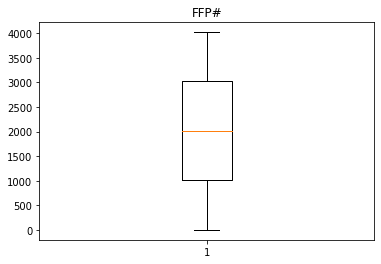

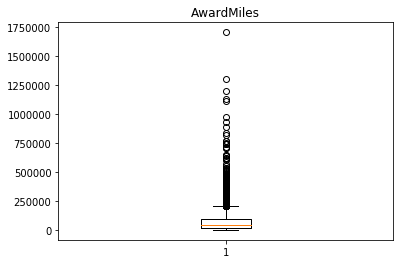

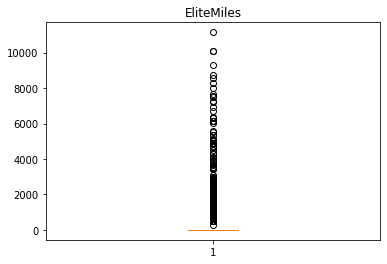

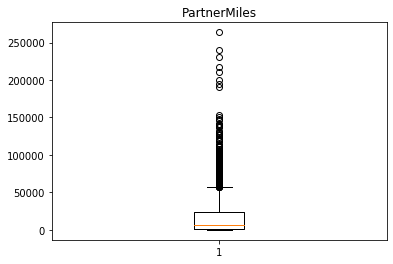

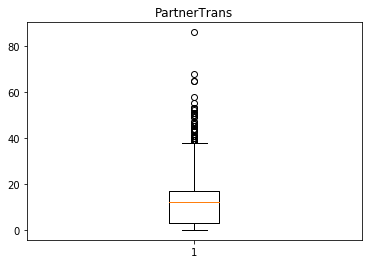

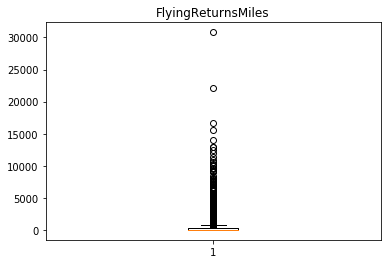

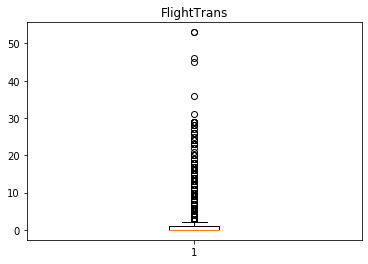

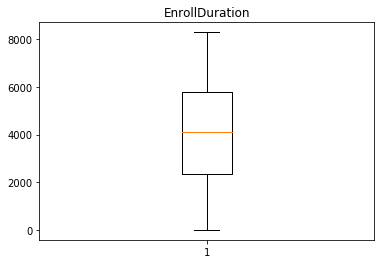

In [8]:
#Boxplot of numerical columns
num_col=[n for n in data.columns if data[n].dtypes!='object']
for col in num_col:
    plt.boxplot(data[col])
    plt.title(col)
    plt.show()

<b>#Observation</b><br>There are so many extreme values in the dataset. But we cannot remove those values as it is normal that some people will have get more miles and some with less miles.

In [9]:
#Droping the column FFP#
data=data.drop(['FFP#'],axis=1)

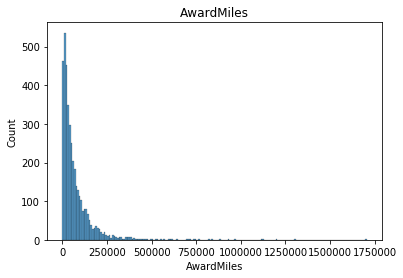

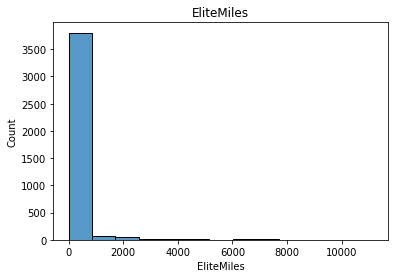

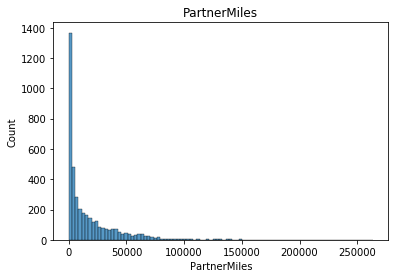

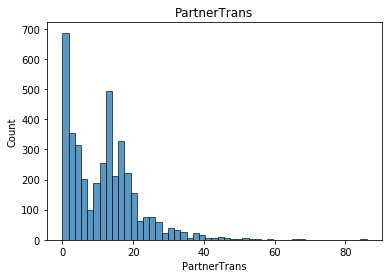

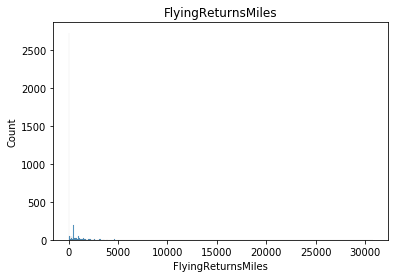

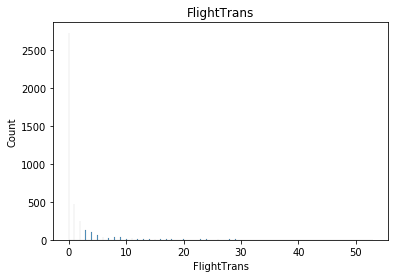

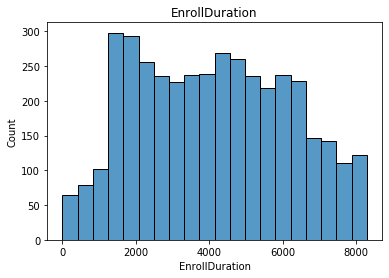

In [10]:
#Histograms of all variables
num_col=[n for n in data.columns if data[n].dtypes!='object']
for col in num_col:
    sns.histplot(data[col],x=data[col])
    plt.title(col)
    plt.show()

<b>#Observation</b><br>Dataset is highly skewed

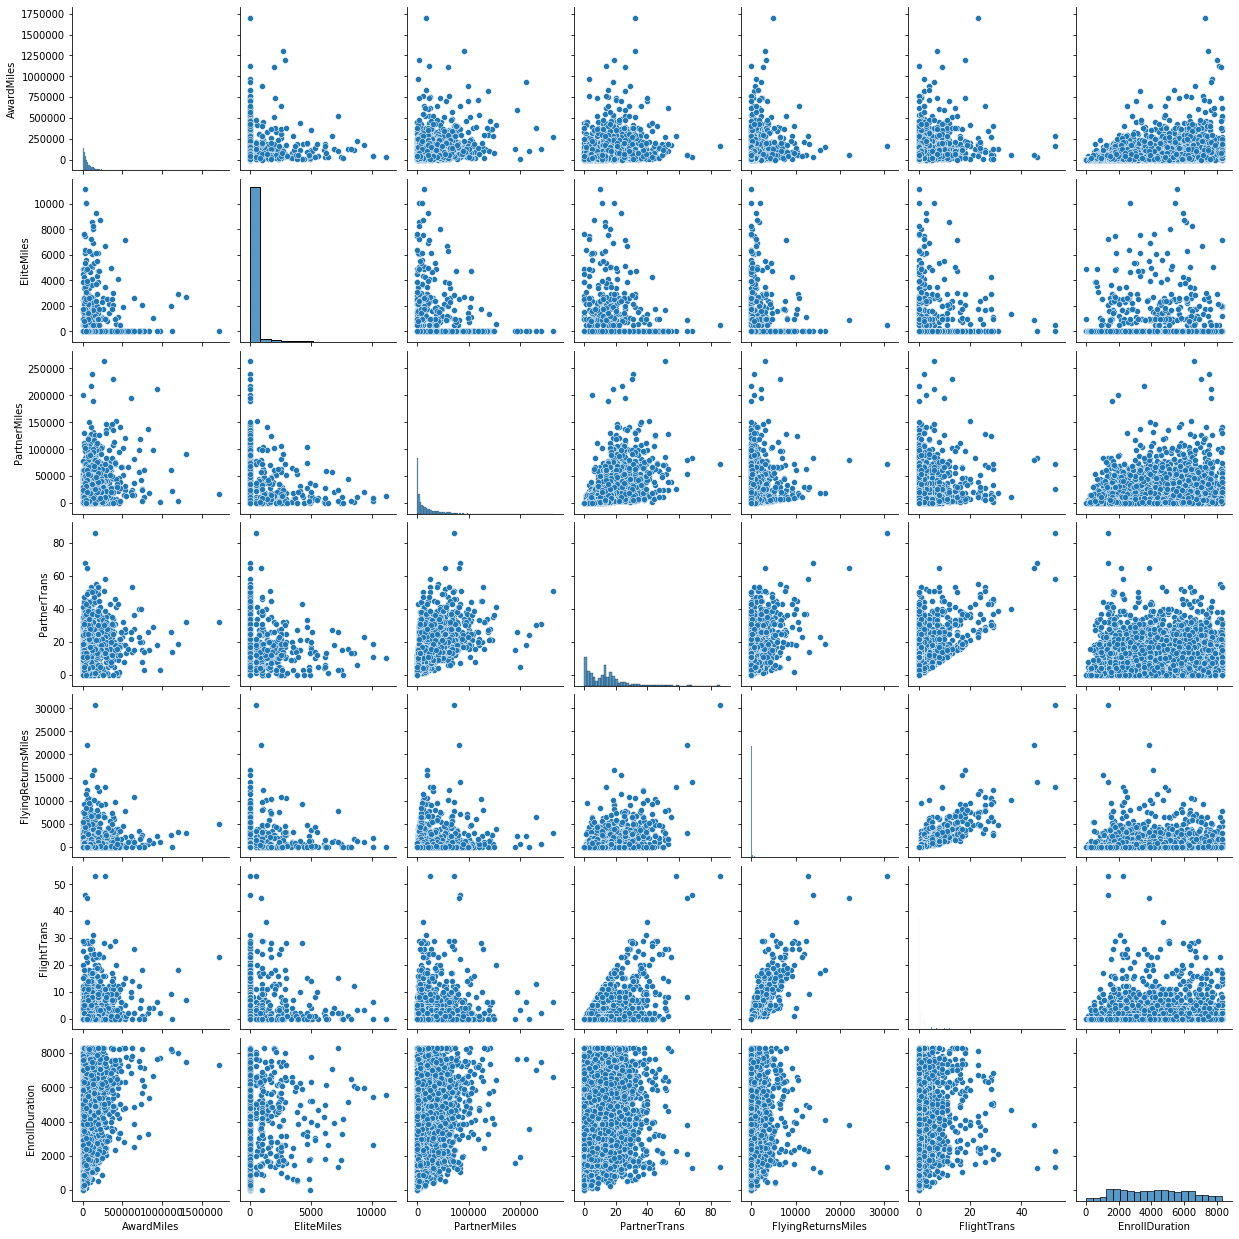

In [11]:
#Pairplot of all variables
sns.pairplot(data)

<b>#Observation</b><br>
There is colinearity between FlyingReturnsMiles and FlightTrans.<br>PartnerMiles and PartnerTrans also has colinearity.

In [12]:
#to find the corelation
corr = data.corr()
#print(corr)
print(round(corr,2))

                    AwardMiles  EliteMiles  PartnerMiles  PartnerTrans  \
AwardMiles                1.00        0.11          0.40          0.32   
EliteMiles                0.11        1.00          0.03          0.05   
PartnerMiles              0.40        0.03          1.00          0.60   
PartnerTrans              0.32        0.05          0.60          1.00   
FlyingReturnsMiles        0.22        0.13          0.18          0.38   
FlightTrans               0.26        0.14          0.19          0.43   
EnrollDuration            0.26        0.02          0.21          0.16   

                    FlyingReturnsMiles  FlightTrans  EnrollDuration  
AwardMiles                        0.22         0.26            0.26  
EliteMiles                        0.13         0.14            0.02  
PartnerMiles                      0.18         0.19            0.21  
PartnerTrans                      0.38         0.43            0.16  
FlyingReturnsMiles                1.00         0.87      

<b>#Observation</b><br>There is positive correlation with FlyingReturnMiles and FlightTrans . When the value of FlightTrans increase the FlyingReturnMiles also increases.There is positive corelation with PartnerTrans and PartnerMiles.

In [13]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data = pd.DataFrame()
vif_data["feature"] = data.columns
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(data.values, i)
                          for i in range(len(data.columns))]
print(vif_data)

              feature       VIF
0          AwardMiles  2.002288
1          EliteMiles  1.060842
2        PartnerMiles  2.600737
3        PartnerTrans  4.026951
4  FlyingReturnsMiles  4.546835
5         FlightTrans  4.987696
6      EnrollDuration  2.457791


<b>Observation</b><br>VIF values for all columns are less than 5 which means the colinearity is less and there is no need to remove the columns.

In [14]:
#Standardising the data
features=data.columns
data2=data.copy()
data2=StandardScaler().fit_transform(data2.values)
data2=pd.DataFrame(data2,columns=features)

Inorder to make the maginute similar for all variables the data is standardised.Otherwise, the dissimilarity/similarity will be over-influenced by higher valued columns and under-influenced by smaller valued columns

# K Means Clustering

#Clustering is an unsupervised machine learning technique, where there are no defined dependent and independent variables. The patterns in the data are used to identify / group similar observations.

In [15]:
#Applying K Means
distortions=[]
for k in range(1,11):
    km=cluster.KMeans(n_clusters=k,init='k-means++',n_init=10,max_iter=300,random_state=100)
    km.fit(data2.values)
    distortions.append(km.inertia_)

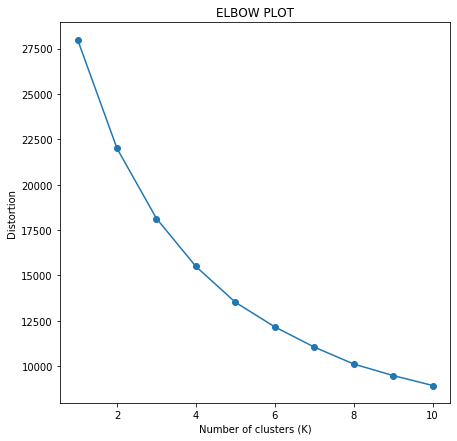

In [16]:
#Finding the optimum k value using Elbow Plot
plt.figure(figsize = (7,7))
plt.plot(range(1,11),distortions,marker='o')
plt.title('ELBOW PLOT')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Distortion')
plt.show()

<b>#Observation</b><br>From the above Elbow plot we can consider the k values from 3 to 5.Here I am taking the k value as 4.

In [17]:
X=data2[features].values
range_n_clusters = [2,3,4,5]
import matplotlib.cm as cm
import numpy as np

For n_clusters = 2 The average silhouette_score is : 0.51283372993152
For n_clusters = 3 The average silhouette_score is : 0.3137275908740644
For n_clusters = 4 The average silhouette_score is : 0.32283335004629665
For n_clusters = 5 The average silhouette_score is : 0.2494128527210081


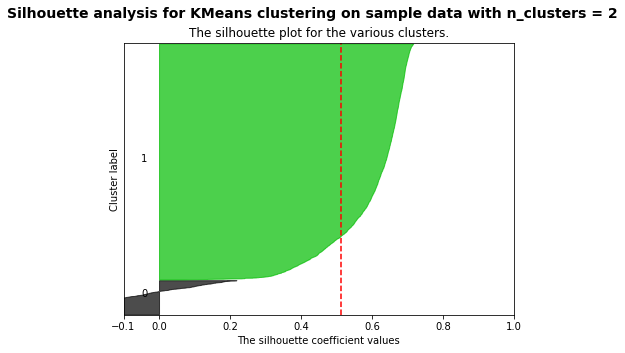

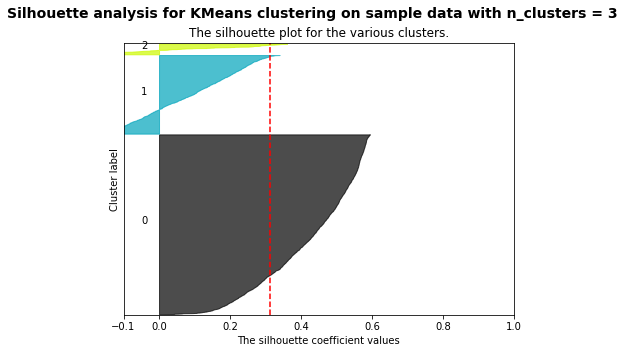

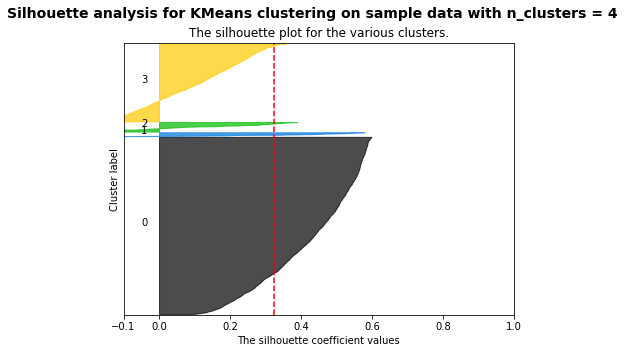

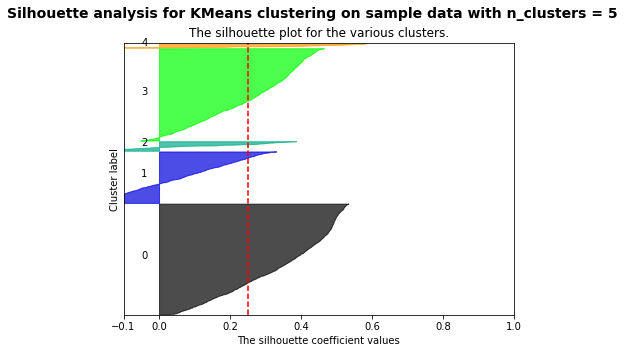

In [18]:
for n_clusters in range_n_clusters:
    fig, (ax1) = plt.subplots()
    fig.set_size_inches(7, 5)
     # The silhouette coefficient can range from -1, 1 
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    clusterer = cluster.KMeans(n_clusters=n_clusters,init='k-means++',n_init=10,max_iter=300,random_state=100)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")
    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

<b>#Observation</b><br>#The value of 2 and 4 for n_clusters looks to be the optimal one.<br>When k= 4,The silhouette score for each cluster is above average silhouette scores. Score is high when k=2 but one of clusters is below-average silhouette scores.So I am considering the next highest score.ie,when k=4.

In [19]:
#KMeans using the optimum k values found using Elbow plot and Silhoutte plot
data_km=data2.copy()
k = 4
km4=cluster.KMeans(n_clusters=k,init='k-means++',n_init = 10,max_iter = 300,random_state=100)
km4.fit(data_km.values)
labels = km4.labels_
Ccenters = km4.cluster_centers_
data_km['labels'] = labels
data_km['labels'] = data_km['labels'].astype('str')

In [20]:
#Number of samples in each cluster
data_km['labels'].value_counts()

0    2642
3    1157
2     142
1      58
Name: labels, dtype: int64

In [21]:
#PairPlot labels as hue
#sns.pairplot(data_km, x_vars = features, y_vars = features, hue='labels', diag_kind='kde')
#plt.show()

In [22]:
c_df = pd.concat([data[data_km['labels']=='0'].mean(),data[data_km['labels']=='1'].mean(),data[data_km['labels']=='2'].mean(),data[data_km['labels']=='3'].mean()],axis=1)
c_df.columns = ['cluster1','cluster2','cluster3','cluster4']
c_df

,cluster1,cluster2,cluster3,cluster4
AwardMiles,40076.597653,113087.586207,191351.542254,133723.715644
EliteMiles,42.144966,5494.965517,474.887324,68.128781
PartnerMiles,5961.430356,19285.637931,33244.119718,40598.884183
PartnerTrans,7.141559,12.327586,28.338028,19.696629
FlyingReturnsMiles,183.200984,950.551724,5787.873239,413.773552
FlightTrans,0.556775,2.793103,16.823944,1.271392
EnrollDuration,3593.450416,3836.189655,4650.154930,5266.553155


In [23]:
cluster4=pd.concat([data[data_km['labels']=='3']])
cluster3=pd.concat([data[data_km['labels']=='2']])
cluster2=pd.concat([data[data_km['labels']=='1']])
cluster1=pd.concat([data[data_km['labels']=='0']])

In [24]:
cluster1.describe()

,AwardMiles,EliteMiles,PartnerMiles,PartnerTrans,FlyingReturnsMiles,FlightTrans,EnrollDuration
count,2642.000000,2642.000000,2642.000000,2642.000000,2642.000000,2642.000000,2642.000000
mean,40076.597653,42.144966,5961.430356,7.141559,183.200984,0.556775,3593.450416
std,39948.507086,276.101470,7773.602886,6.245485,536.759445,1.403461,1952.911241
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
25%,13066.000000,0.000000,400.000000,1.000000,0.000000,0.000000,1955.000000
50%,27598.000000,0.000000,2747.500000,5.000000,0.000000,0.000000,3403.500000
75%,53984.500000,0.000000,8500.000000,13.000000,0.000000,0.000000,5063.750000
max,385195.000000,2788.000000,50255.000000,34.000000,6251.000000,11.000000,8296.000000


In [25]:
cluster2.describe()

,AwardMiles,EliteMiles,PartnerMiles,PartnerTrans,FlyingReturnsMiles,FlightTrans,EnrollDuration
count,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000
mean,113087.586207,5494.965517,19285.637931,12.327586,950.551724,2.793103,3836.189655
std,105191.753836,2018.851245,22330.474345,8.321159,1445.344749,3.905725,2049.003262
min,6015.000000,2738.000000,0.000000,0.000000,0.000000,0.000000,30.000000
25%,41011.750000,3867.000000,3212.500000,5.000000,0.000000,0.000000,2107.500000
50%,85464.500000,4969.000000,11330.000000,13.000000,500.000000,1.000000,3856.500000
75%,169086.500000,6644.250000,24233.500000,17.000000,1183.000000,3.000000,5539.250000
max,529886.000000,11148.000000,104159.000000,33.000000,7741.000000,15.000000,8296.000000


In [26]:
cluster3.describe()

,AwardMiles,EliteMiles,PartnerMiles,PartnerTrans,FlyingReturnsMiles,FlightTrans,EnrollDuration
count,1.420000e+02,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000
mean,1.913515e+05,474.887324,33244.119718,28.338028,5787.873239,16.823944,4650.154930
std,2.457045e+05,884.395415,35340.960569,13.779359,3874.337859,8.566220,2111.098784
min,2.310000e+02,0.000000,1753.000000,2.000000,1300.000000,1.000000,1041.000000
25%,5.629950e+04,0.000000,8478.500000,18.000000,3450.000000,11.000000,2519.750000
50%,1.200420e+05,0.000000,19299.000000,27.000000,4686.500000,15.000000,4687.000000
75%,2.074865e+05,697.000000,50815.750000,36.750000,6987.500000,20.000000,6450.500000
max,1.704838e+06,4301.000000,230629.000000,86.000000,30817.000000,53.000000,8296.000000


In [27]:
cluster4.describe()

,AwardMiles,EliteMiles,PartnerMiles,PartnerTrans,FlyingReturnsMiles,FlightTrans,EnrollDuration
count,1.157000e+03,1157.000000,1157.000000,1157.000000,1157.000000,1157.000000,1157.000000
mean,1.337237e+05,68.128781,40598.884183,19.696629,413.773552,1.271392,5266.553155
std,1.249015e+05,346.477392,28874.948309,7.603753,715.781622,2.144596,1816.023043
min,4.680000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,669.000000
25%,5.689600e+04,0.000000,20802.000000,15.000000,0.000000,0.000000,4023.000000
50%,1.013970e+05,0.000000,36269.000000,18.000000,0.000000,0.000000,5443.000000
75%,1.635300e+05,0.000000,53108.000000,23.000000,500.000000,2.000000,6637.000000
max,1.125076e+06,2880.000000,263685.000000,53.000000,4130.000000,12.000000,8296.000000


<b>#Observations</b><br>
Clusters got after K Means Clustering are given below:<br>
Cluster 1 has the lowest mean values in all columns.They are Infrequent Travellers. Number of customers are more in this category.
<br>Cluster 2 has the highest mean value in  EliteMiles.They are Luxury Travellers/Premium Class. Less number of customers are there in this cluster.
<br>Cluster 3 has the highest mean values in AwardMiles,PartnerMiles,FlyingRetunMiles.They are Frequent Travellers.Not many people are there in this group
<br>Cluster 4 has the highest mean EnrollDuration.They are long term customers/Loyal Customers.More number of people are there in this category.They don't have much FlightTrans.Out of 1157 customers,25% customers have flight transaction above 2.Still they managed to get the miles points from the PartnerTrans.

   AwardMiles  EliteMiles  PartnerMiles  PartnerTrans  FlyingReturnsMiles  \
0       42040        1000         14189            17                4034   
1       30486           0             0             0                   0   
2       85496           0          2799             7                2711   
3        1884           0             0             0                   0   
4       42044        2253         11433            10                   0   

   FlightTrans  EnrollDuration                 labels  
0           13            5717    Frequent Travellers  
1            0            5051  Infrequent Travellers  
2            6            3820  Infrequent Travellers  
3            0              31  Infrequent Travellers  
4            0            6140  Infrequent Travellers  


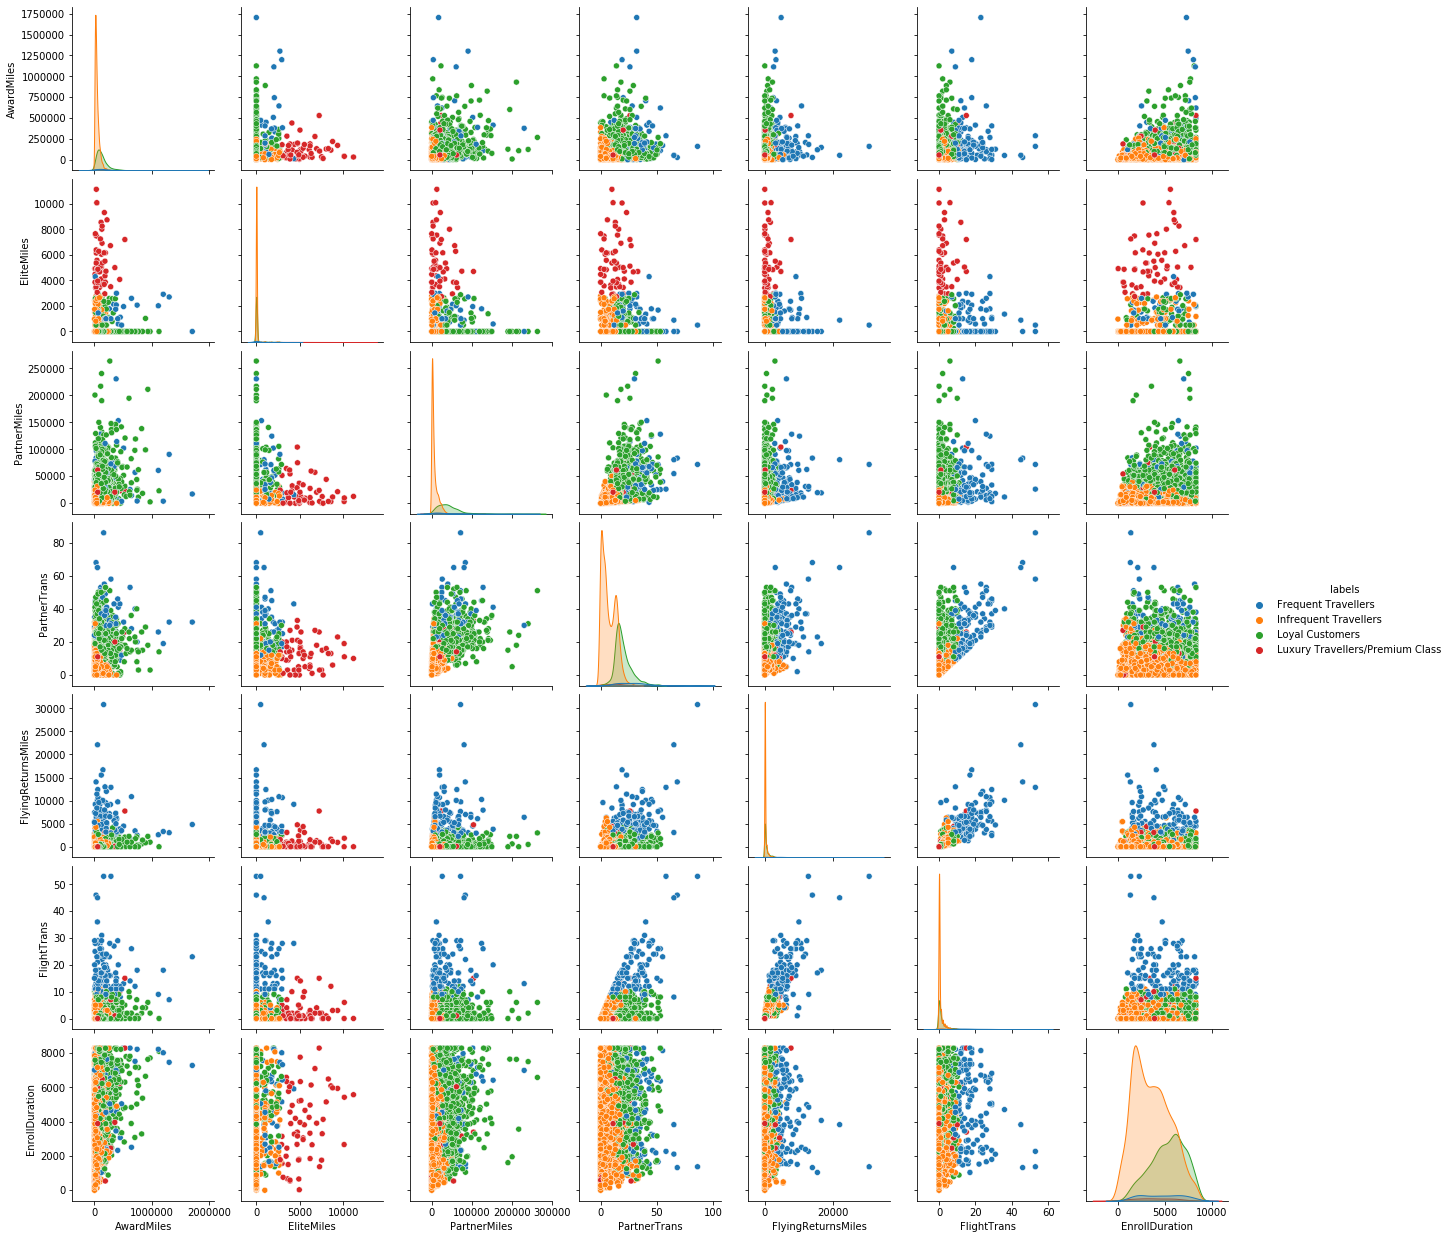

In [28]:
Customertype=['Infrequent Travellers','Luxury Travellers/Premium Class','Frequent Travellers','Loyal Customers']
data['labels']=labels
data['labels']=data['labels'].map({0:Customertype[0],1:Customertype[1],2:Customertype[2],3:Customertype[3]})
print(data.head())    
sns.pairplot(data,kind='scatter',hue='labels')

# Hierarchical Clustering

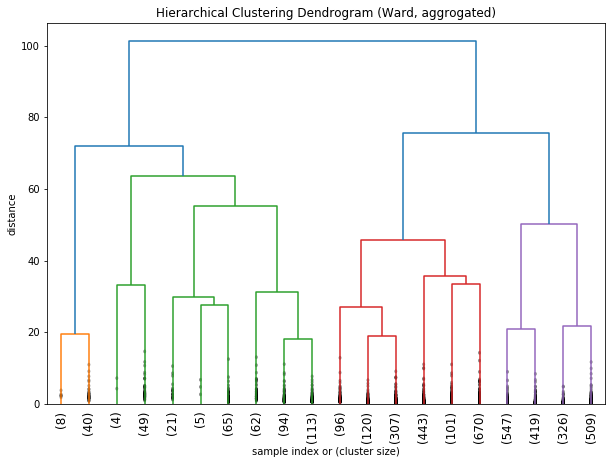

In [29]:
linkage_matrix = linkage(data2, 'ward')
figure = plt.figure(figsize=(10, 7))
dendrogram(
    linkage_matrix,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=20,  # fixing 'p'
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True),  # to get a distribution impression in truncated branches
plt.title('Hierarchical Clustering Dendrogram (Ward, aggrogated)')
plt.xlabel('sample index or (cluster size)')
plt.ylabel('distance')
plt.show()

From the above Dendrogram if we cut a line at distance =70 we will get 4 clusters.

For n_clusters = 2 The average silhouette_score is : 0.5107359799321678
For n_clusters = 3 The average silhouette_score is : 0.20042444794127307
For n_clusters = 4 The average silhouette_score is : 0.21151824838818542
For n_clusters = 5 The average silhouette_score is : 0.21789949102300532


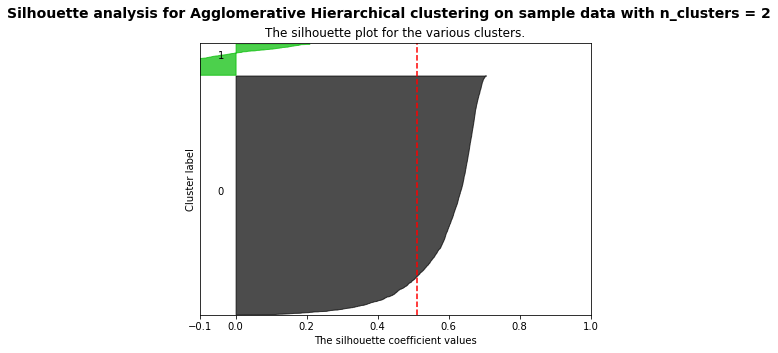

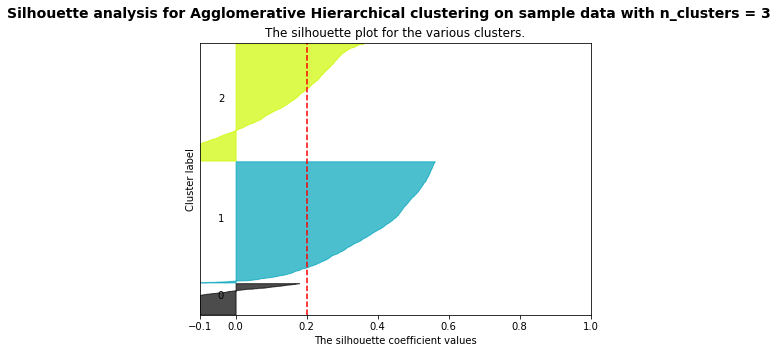

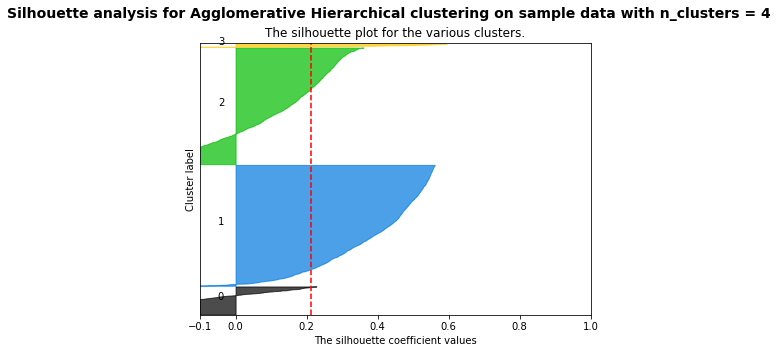

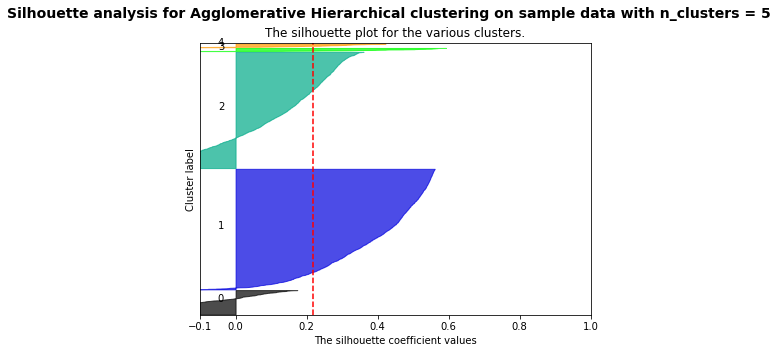

In [30]:
for n_clusters in range_n_clusters:
    
    fig, (ax1) = plt.subplots()
    fig.set_size_inches(7, 5)
    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])
    clusterer = AgglomerativeClustering(n_clusters=n_clusters, affinity='euclidean', linkage='ward')
    cluster_labels = clusterer.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)
    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)
    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)
        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
 
    plt.suptitle(("Silhouette analysis for Agglomerative Hierarchical clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

<b>Observation</b><br>#The value of 4 and 5 for n_clusters looks to be the optimal one.when k= 4,The silhouette score for each cluster is above average silhouette scores.
Other k values have Presence of clusters with below-average silhouette scores 

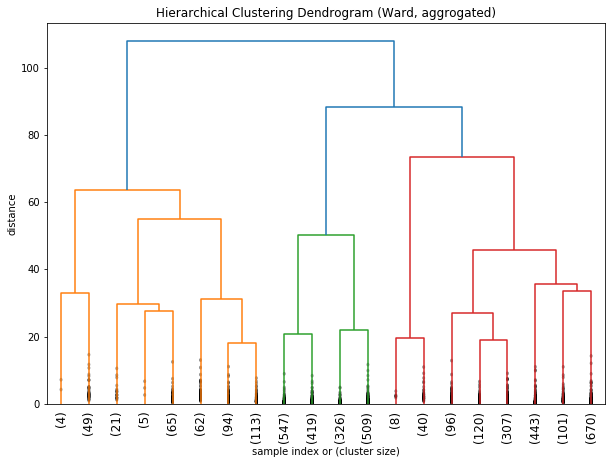

In [31]:
data_hc=data2.copy()
h_cluster = AgglomerativeClustering(
    n_clusters=4, affinity='euclidean', linkage='ward').fit(data2)
labels = h_cluster.labels_
data_hc['labels'] = labels

data_hc['labels'] = data_hc['labels'].astype('str')

#sns.pairplot(data_hc, x_vars=features, y_vars=features,
 #            hue='labels', diag_kind='hist')
plt.show()

linkage_matrix = linkage(data_hc, 'ward')
figure = plt.figure(figsize=(10, 7))
dendrogram(
    linkage_matrix,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=20,  # fixing 'p'
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True),  # to get a distribution impression in truncated branches
plt.title('Hierarchical Clustering Dendrogram (Ward, aggrogated)')
plt.xlabel('sample index or (cluster size)')
plt.ylabel('distance')
plt.show()


In [32]:
data_hc['labels'].value_counts()

1    1801
2    1737
0     413
3      48
Name: labels, dtype: int64

In [33]:
c_df = pd.concat([data[data_hc['labels']=='0'].mean(),data[data_hc['labels']=='1'].mean(),data[data_hc['labels']=='2'].mean(),data[data_hc['labels']=='3'].mean()],axis=1)
c_df.columns = ['cluster1','cluster2','cluster3','cluster4']
c_df

,cluster1,cluster2,cluster3,cluster4
AwardMiles,197965.772397,37353.074403,79910.013241,135318.020833
EliteMiles,189.113801,0.882288,123.694876,5870.062500
PartnerMiles,35735.278450,3651.923931,26735.156592,16406.000000
PartnerTrans,21.556901,4.246530,16.832470,12.645833
FlyingReturnsMiles,3116.484262,137.491394,148.672424,974.770833
FlightTrans,8.917676,0.451416,0.483592,3.270833
EnrollDuration,4654.670702,3402.970572,4727.468048,4320.375000


In [34]:
clust4=pd.concat([data[data_hc['labels']=='3']])
clust3=pd.concat([data[data_hc['labels']=='2']])
clust2=pd.concat([data[data_hc['labels']=='1']])
clust1=pd.concat([data[data_hc['labels']=='0']])

In [35]:
clust1.describe()

,AwardMiles,EliteMiles,PartnerMiles,PartnerTrans,FlyingReturnsMiles,FlightTrans,EnrollDuration
count,4.130000e+02,413.000000,413.000000,413.000000,413.000000,413.000000,413.000000
mean,1.979658e+05,189.113801,35735.278450,21.556901,3116.484262,8.917676,4654.670702
std,2.241652e+05,597.057668,41107.626124,12.446576,3129.311847,7.988341,2112.915699
min,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,429.000000
25%,5.204600e+04,0.000000,7688.000000,12.000000,1300.000000,4.000000,2727.000000
50%,1.110640e+05,0.000000,21248.000000,19.000000,2400.000000,7.000000,4736.000000
75%,2.925330e+05,0.000000,47286.000000,28.000000,3900.000000,11.000000,6408.000000
max,1.704838e+06,4704.000000,263685.000000,86.000000,30817.000000,53.000000,8296.000000


In [36]:
clust2.describe()

,AwardMiles,EliteMiles,PartnerMiles,PartnerTrans,FlyingReturnsMiles,FlightTrans,EnrollDuration
count,1801.000000,1801.000000,1801.000000,1801.000000,1801.000000,1801.000000,1801.000000
mean,37353.074403,0.882288,3651.923931,4.246530,137.491394,0.451416,3402.970572
std,43285.027591,21.673320,5786.235471,4.450502,360.884457,1.051454,2030.564606
min,50.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000
25%,10959.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1763.000000
50%,23224.000000,0.000000,1136.000000,3.000000,0.000000,0.000000,2922.000000
75%,45522.000000,0.000000,4500.000000,6.000000,0.000000,0.000000,4926.000000
max,288379.000000,589.000000,36532.000000,19.000000,3604.000000,7.000000,8296.000000


In [37]:
clust3.describe()

,AwardMiles,EliteMiles,PartnerMiles,PartnerTrans,FlyingReturnsMiles,FlightTrans,EnrollDuration
count,1737.000000,1737.000000,1737.000000,1737.000000,1737.000000,1737.000000,1737.000000
mean,79910.013241,123.694876,26735.156592,16.832470,148.672424,0.483592,4727.468048
std,62545.511797,503.348535,23150.383405,6.795747,327.892225,1.006826,1846.834047
min,329.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
25%,32742.000000,0.000000,8183.000000,13.000000,0.000000,0.000000,3404.000000
50%,63392.000000,0.000000,20594.000000,15.000000,0.000000,0.000000,4726.000000
75%,109625.000000,0.000000,39561.000000,19.000000,100.000000,1.000000,6148.000000
max,380930.000000,3861.000000,150010.000000,53.000000,3100.000000,9.000000,8296.000000


In [38]:
clust4.describe()

,AwardMiles,EliteMiles,PartnerMiles,PartnerTrans,FlyingReturnsMiles,FlightTrans,EnrollDuration
count,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000
mean,135318.020833,5870.062500,16406.000000,12.645833,974.770833,3.270833,4320.375000
std,124625.451430,2027.569128,17644.596177,8.195717,1457.893573,4.369817,1964.842971
min,6015.000000,2081.000000,0.000000,0.000000,0.000000,0.000000,30.000000
25%,39639.000000,4622.750000,3343.750000,5.000000,0.000000,0.000000,3033.250000
50%,110583.000000,5368.000000,10855.000000,13.000000,500.000000,1.500000,4409.500000
75%,182853.750000,7221.750000,21724.000000,17.250000,1265.000000,4.000000,5951.750000
max,529886.000000,11148.000000,75019.000000,29.000000,7741.000000,15.000000,8296.000000


<b>#Observations<br>
Below are clusters obtained after Agglomerative Heirarchical Clustering:<br>
    <br>
Cluster 1 has the highest AwardMiles and more PartnerMiles and FlyingRetunMiles.They are Frequent Travellers.Not many people are there in this group
<br>Cluster 2 has the lowest mean values in all columns.They are Infrequent Travellers. Number of customers are more in this category.
<br>Cluster 3 has the highest mean EnrollDuration.They are long term customers/Loyal Customers.More number of people are there in this category.They don't have much FlightTrans.Still they managed to get the miles points from the PartnerTrans.
<br>Cluster 4 has the highest mean value in  EliteMiles.They are Luxury Travellers/Premium Class. Less number of customers are there in this cluster.

   AwardMiles  EliteMiles  PartnerMiles  PartnerTrans  FlyingReturnsMiles  \
0       42040        1000         14189            17                4034   
1       30486           0             0             0                   0   
2       85496           0          2799             7                2711   
3        1884           0             0             0                   0   
4       42044        2253         11433            10                   0   

   FlightTrans  EnrollDuration                 labels  
0           13            5717    Frequent Travellers  
1            0            5051  Infrequent Travellers  
2            6            3820    Frequent Travellers  
3            0              31  Infrequent Travellers  
4            0            6140        Loyal Customers  


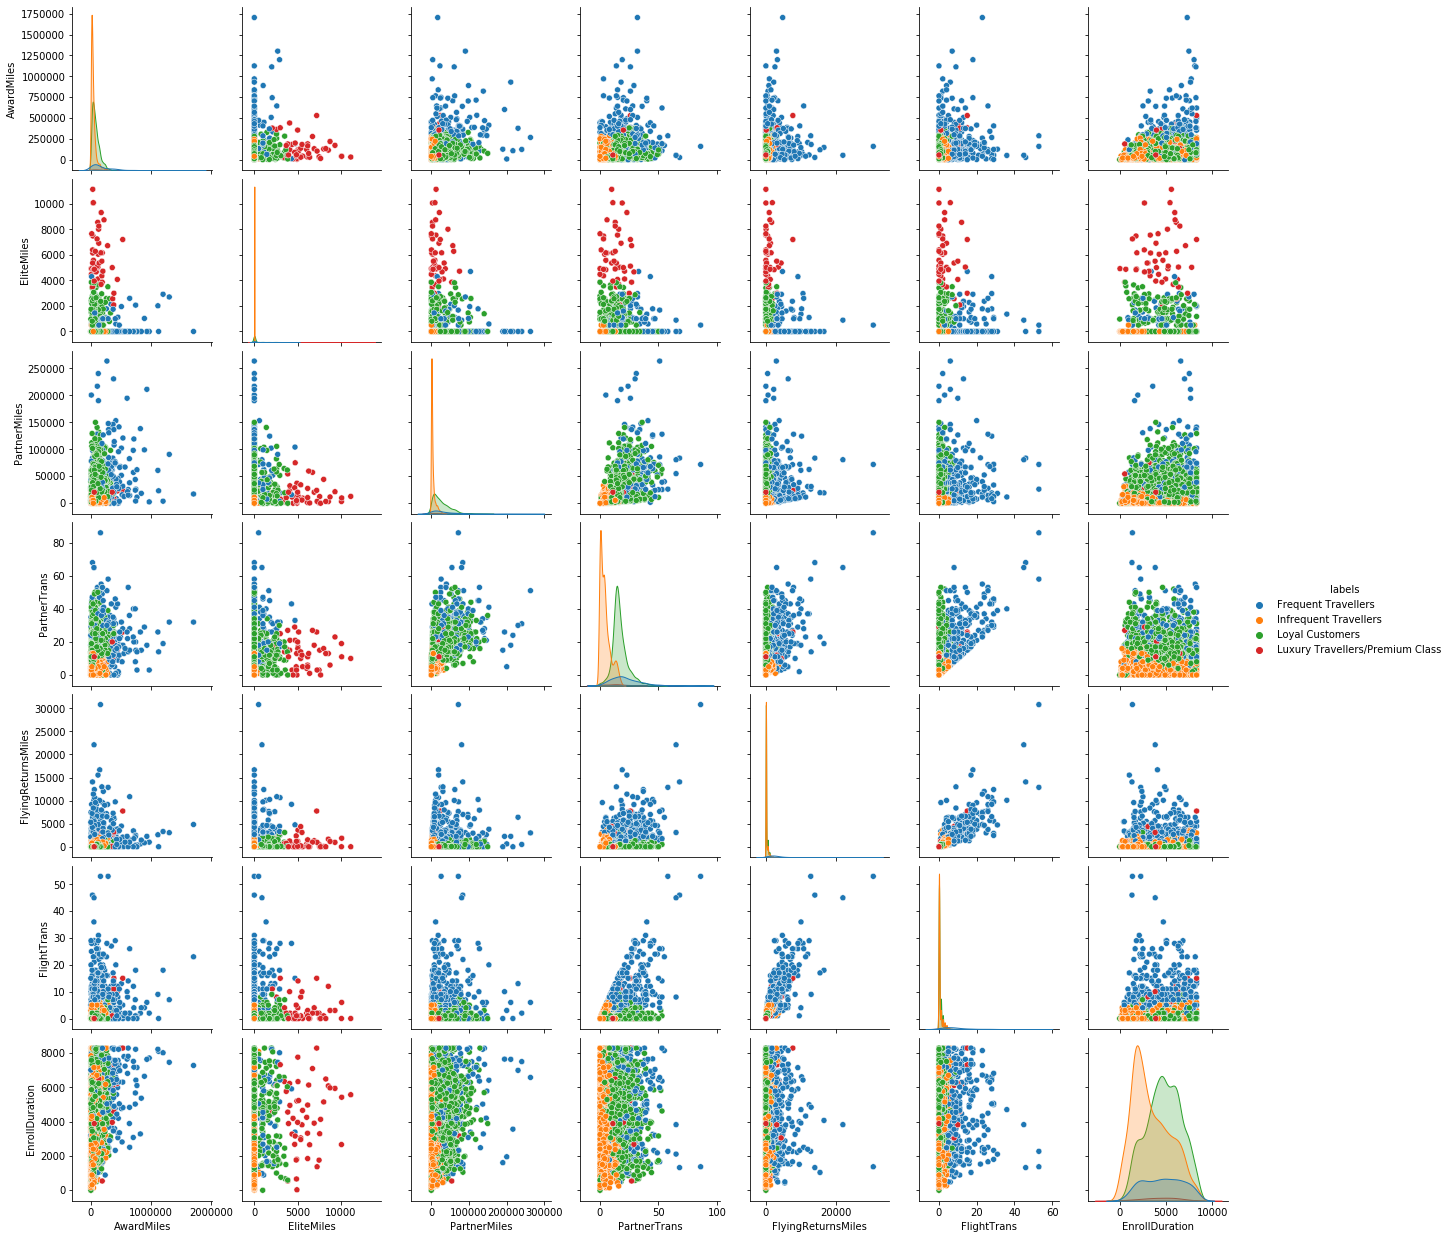

In [39]:
Customertype=['Frequent Travellers','Infrequent Travellers','Loyal Customers','Luxury Travellers/Premium Class']
data['labels']=labels
data['labels']=data['labels'].map({0:Customertype[0],1:Customertype[1],2:Customertype[2],3:Customertype[3]})
print(data.head())    
sns.pairplot(data,kind='scatter',hue='labels')

In [40]:
data4=data2.copy()
h_cluster = AgglomerativeClustering(n_clusters=4,affinity='euclidean', linkage='complete').fit(data2)
data4['labels'] = h_cluster.labels_
data4['labels'] = data4['labels'].astype('str')
data4['labels'].value_counts()

0    3924
3      53
2      18
1       4
Name: labels, dtype: int64

In [41]:
h_cluster = AgglomerativeClustering(n_clusters=4,affinity='euclidean', linkage='average').fit(data2)
data4['labels'] = h_cluster.labels_
data4['labels'] = data4['labels'].astype('str')
data4['labels'].value_counts()

0    3982
1      15
2       1
3       1
Name: labels, dtype: int64

In [42]:
h_cluster = AgglomerativeClustering(n_clusters=4,affinity='euclidean', linkage='single').fit(data2)
data4['labels'] = h_cluster.labels_
data4['labels'] = data4['labels'].astype('str')
data4['labels'].value_counts()

1    3994
0       3
2       1
3       1
Name: labels, dtype: int64

In [43]:
h_cluster = AgglomerativeClustering(n_clusters=4,affinity='mahalanobis', linkage='complete').fit(data2)
data4['labels'] = h_cluster.labels_
data4['labels'] = data4['labels'].astype('str')
data4['labels'].value_counts()

0    3963
3      22
1       7
2       7
Name: labels, dtype: int64

In [44]:
h_cluster = AgglomerativeClustering(n_clusters=4,affinity='mahalanobis', linkage='average').fit(data2)
data4['labels'] = h_cluster.labels_
data4['labels'] = data4['labels'].astype('str')
data4['labels'].value_counts()

2    3987
0       7
1       4
3       1
Name: labels, dtype: int64

#<b>Observations:</b><br>
After considering the above affinities and linkages we can see that 'euclidean' distance and 'ward' linkage is giving the better results for this clustering.Ward linkage will work only with affinity as Euclidean 


Hierarchical Clustering and KMeans are giving different number of customers in the clusters.Clusters are overlapping in both methods.